In [120]:
#Import packages for this project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [121]:
#Read in the data
vgsales = pd.read_csv('C:/Users/jorda/OneDrive/Documents/Python Data/Video Games/vgsales.csv', parse_dates=['Year'])
vgsales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006-01-01,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985-01-01,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008-01-01,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009-01-01,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996-01-01,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [122]:
#Check data types
vgsales.dtypes

Rank                     int64
Name                    object
Platform                object
Year            datetime64[ns]
Genre                   object
Publisher               object
NA_Sales               float64
EU_Sales               float64
JP_Sales               float64
Other_Sales            float64
Global_Sales           float64
dtype: object

In [123]:
#Overview of our data
vgsales.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006-05-29 07:49:49.673546880,0.264667,0.146652,0.077782,0.048063,0.537441
min,1.000000,1980-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007-01-01 00:00:00,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010-01-01 00:00:00,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020-01-01 00:00:00,41.490000,29.020000,10.220000,10.570000,82.740000
std,4791.853933,NaN,0.816683,0.505351,0.309291,0.188588,1.555028


In [124]:
#Create data frame of the 5 highest selling platforms from 2006 - 2016
# top_5_platforms = (vgsales.groupby('Platform')[['Global_Sales']].sum()
#                     .sort_values(by='Global_Sales', ascending=False)
#                     .reset_index().iloc[:5])

mask = (vgsales['Year'] >= '2006-01-01') & (vgsales['Year'] <= '2016-01-01')

top_5_platforms = (vgsales.loc[mask]
                     .groupby('Platform')[['Global_Sales']].sum()
                     .sort_values(by='Global_Sales', ascending=False)
                     .reset_index()
                     .iloc[:5]
)

top_5_platforms

,Platform,Global_Sales
0,X360,961.29
1,PS3,949.35
2,Wii,909.81
3,DS,669.79
4,PS4,278.07


In [125]:
#Save a list of the 5 highest grossing platforms
platforms = list(top_5_platforms['Platform'].unique())

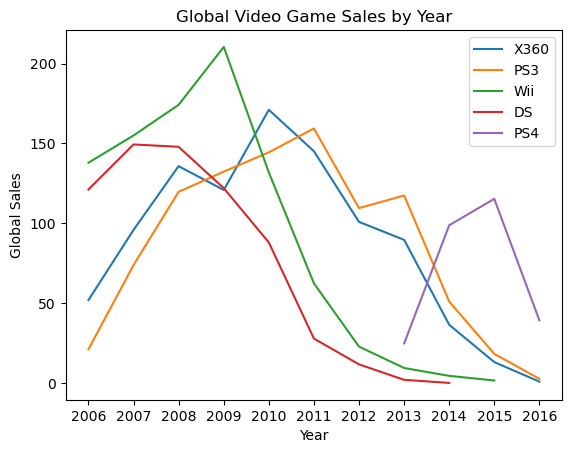

In [126]:
#Plot the sales of the 5 highest selling platforms from 2006 - 2016
for i, platform in enumerate(platforms):
    xi = vgsales.loc[mask & (vgsales['Platform'] == platform)].groupby('Year')[['Global_Sales']].sum().reset_index()['Year']
    yi = vgsales.loc[mask & (vgsales['Platform'] == platform)].groupby('Year')[['Global_Sales']].sum().reset_index()['Global_Sales']
    
    plt.plot(xi, yi, label=platform)

plt.xlabel("Year") 
plt.ylabel("Global Sales") 
plt.title("Global Video Game Sales by Year")
plt.legend()
plt.show()

<AxesSubplot:xlabel='NA_Sales', ylabel='EU_Sales'>

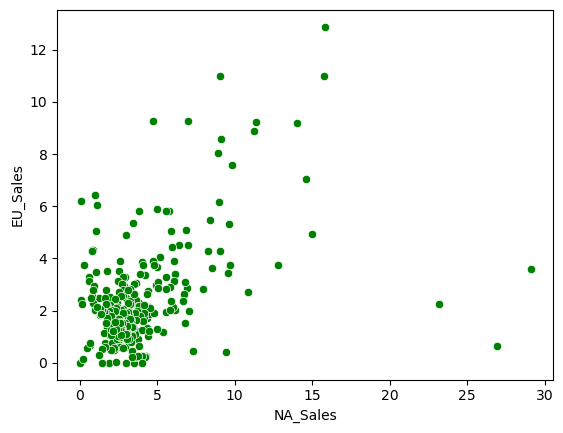

In [127]:
#Plot NA Sales vs EU Sales for games with more than 4M copies sold (excluding Wii Sports)
vgsales_new = vgsales.loc[vgsales['Global_Sales'] > 4].sort_values(by='Global_Sales', ascending=False).iloc[1:]

sns.scatterplot(data=vgsales_new, x='NA_Sales', y='EU_Sales', color='green')


In [128]:
from sklearn.cluster import KMeans

X = vgsales_new[['NA_Sales', 'EU_Sales']].copy()

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\jorda\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


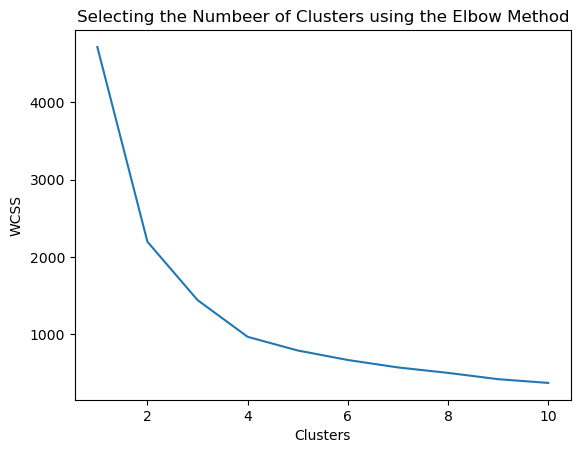

In [129]:
plt.plot(range(1, 11), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [130]:
from sklearn.mixture import GaussianMixture

n_clusters = 4
gmm_model = GaussianMixture(n_components=n_clusters)
gmm_model.fit(X)

GaussianMixture(n_components=4)

In [131]:
cluster_labels = gmm_model.predict(X)
X = pd.DataFrame(X)
X['cluster'] = cluster_labels

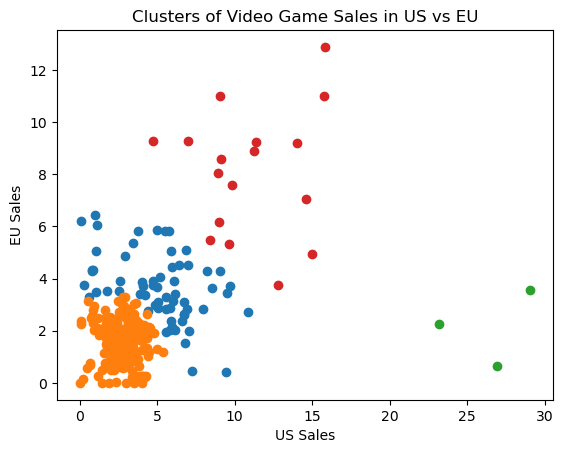

In [132]:
for k in range(0,n_clusters):
    data = X[X["cluster"]==k]
    plt.scatter(data["NA_Sales"],data["EU_Sales"])
    
plt.title("Clusters of Video Game Sales in US vs EU")    
plt.ylabel("EU Sales")
plt.xlabel("US Sales")
plt.show()

Clusters are as follow:

1) Low US sales and low EU Sales

2) Mid US sales and mid EU sales

3) High US Sales and high EU sales

4) Extremely high US sales and low-mid EU Sales